# 머신 러닝 교과서 - 파이토치편

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/ml-with-pytorch/blob/main/ch12/ch12_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

## 패키지 버전 체크

check_packages.py 스크립트에서 로드하기 위해 폴더를 추가합니다:

In [5]:
import sys

# 코랩의 경우 깃허브 저장소로부터 python_environment_check.py를 다운로드 합니다.
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py
else:
    sys.path.insert(0, '..')

권장 패키지 버전을 확인하세요:

In [6]:
import sys
sys.path.append('..')  # 상위 디렉토리 추가

from python_environment_check import check_packages

In [7]:
from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'sklearn': '1.0.0',
    'matplotlib': '3.4.3',
    'torch': '1.9.0',
}
check_packages(d)

[OK] numpy 2.2.6
[OK] scipy 1.15.3
[OK] sklearn 1.6.1
[OK] matplotlib 3.10.3
[OK] torch 2.7.0+cpu


# 12장 - 파이토치를 사용한 신경망 훈련 (파트 2/2)

- 파이토치로 신경망 모델 만들기
  - 파이토치 신경망 모듈 (torch.nn)
  - 선형 회귀 모델 만들기
  - torch.nn과 torch.optim 모듈로 모델 훈련하기
  - 붓꽃 데이터셋을 분류하는 다층 퍼셉트론 만들기
  - 테스트 데이터셋에서 모델 평가하기
  - 훈련되 모델 저장하고 로드하기
- 다층 신경망의 활성화 함수 선택
  - 로지스틱 함수 요약
  - 소프트맥스 함수를 사용한 다중 클래스 확률 예측
  - 하이퍼볼릭 탄젠트로 출력 범위 넓히기
  - 렐루 활성화 함수
- 요약

In [8]:
from IPython.display import Image as IPythonImage
%matplotlib inline

## 파이토치로 신경망 모델 만들기

### 파이토치 신경망 모듈 (torch.nn)

### 선형 회귀 모델 만들기

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

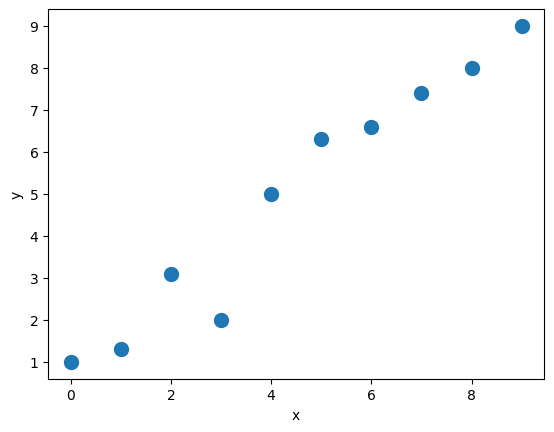

In [10]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('figures/12_07.pdf')
plt.show()

In [11]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

# 일부 컴퓨터에서는 .float()로 명시적으로 타입을 변환해야 합니다.
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [12]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def loss_fn(input, target):
    return (input-target).pow(2).mean()

def model(xb):
    return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()

    if epoch % log_epochs==0:
        print(f'에포크 {epoch}  손실 {loss.item():.4f}')

에포크 0  손실 45.0782
에포크 10  손실 26.4366
에포크 20  손실 1.5918
에포크 30  손실 14.1307
에포크 40  손실 11.6038
에포크 50  손실 6.3084
에포크 60  손실 0.6349
에포크 70  손실 3.1374
에포크 80  손실 1.9999
에포크 90  손실 0.3133
에포크 100  손실 0.7653
에포크 110  손실 1.0039
에포크 120  손실 0.0235
에포크 130  손실 0.5176
에포크 140  손실 0.0759
에포크 150  손실 1.8789
에포크 160  손실 0.0008
에포크 170  손실 0.0866
에포크 180  손실 0.0646
에포크 190  손실 0.0011


최종 파라미터: 2.6696107387542725 4.879678249359131


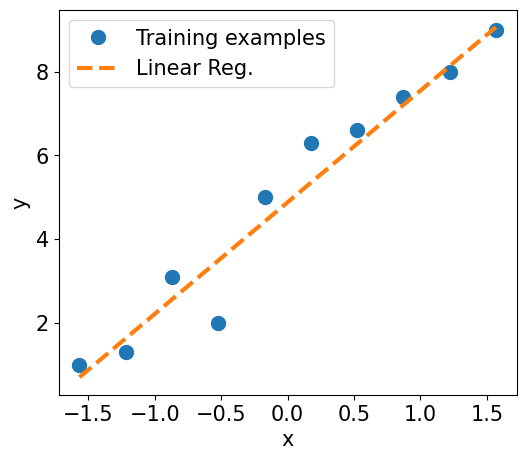

In [13]:
print('최종 파라미터:', weight.item(), bias.item())

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach()  # 계산 그래프에서 텐서를 분리합니다.

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

#plt.savefig('figures/12_08.pdf')

plt.show()

### torch.nn과 torch.optim 모듈로 모델 훈련하기

In [14]:
import torch.nn as nn

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

loss_fn = nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. 예측을 생성합니다.
        pred = model(x_batch)[:, 0]

        # 2. 손실을 계산합니다.
        loss = loss_fn(pred, y_batch)

        # 3. 그레이디언트를 계산합니다.
        loss.backward()

        # 4. 그레이디언트를 사용해 파라미터를 업데이트합니다.
        optimizer.step()

        # 5. 그레이디언트를 0으로 초기화합니다.
        optimizer.zero_grad()

    if epoch % log_epochs==0:
        print(f'에포크 {epoch}  손실 {loss.item():.4f}')

에포크 0  손실 24.6684
에포크 10  손실 29.1377
에포크 20  손실 20.9207
에포크 30  손실 0.1257
에포크 40  손실 12.4922
에포크 50  손실 1.7845
에포크 60  손실 7.6425
에포크 70  손실 2.5606
에포크 80  손실 0.0157
에포크 90  손실 0.7548
에포크 100  손실 0.8412
에포크 110  손실 0.4923
에포크 120  손실 0.0823
에포크 130  손실 0.0794
에포크 140  손실 0.0891
에포크 150  손실 0.0973
에포크 160  손실 0.1043
에포크 170  손실 0.1103
에포크 180  손실 0.0009
에포크 190  손실 0.0764


최종 파라미터: 2.6496422290802 4.87706995010376


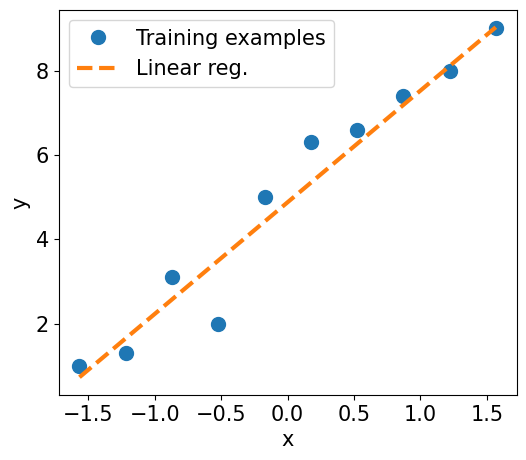

In [15]:
print('최종 파라미터:', model.weight.item(), model.bias.item())

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

#plt.savefig('ch12-linreg-2.pdf')

plt.show()


## 붓꽃 데이터셋을 분류하는 다층 퍼셉트론 만들기

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

In [17]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [18]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()

    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

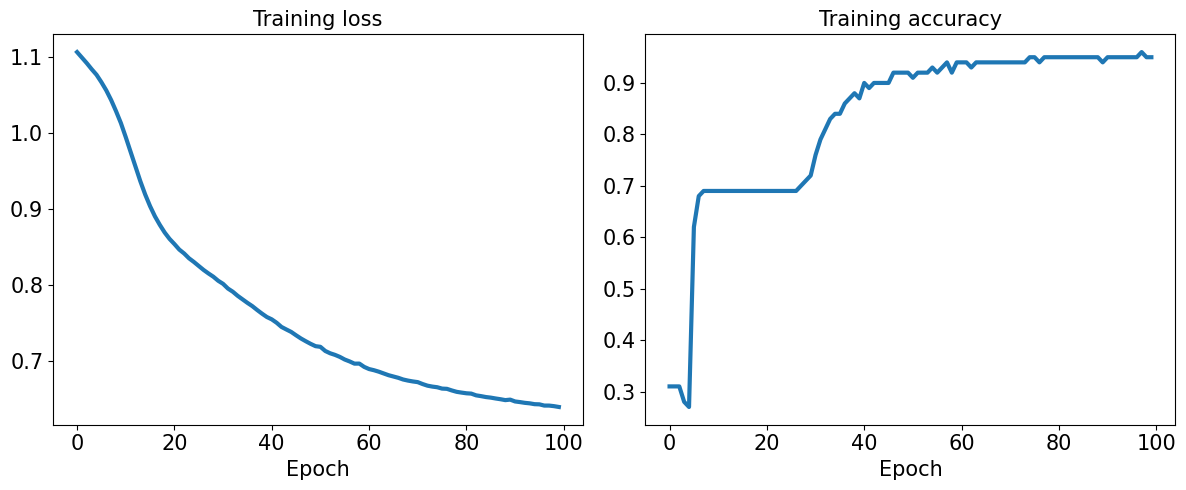

In [20]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')

plt.show()

### 테스트 데이터셋에서 모델 평가하기

In [21]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'테스트 정확도: {accuracy:.4f}')

테스트 정확도: 0.9800


### 훈련된 모델 저장하고 로드하기

In [22]:
path = 'iris_classifier.pt'
torch.save(model, path)

In [23]:
model_new = torch.load(path, weights_only=False)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [24]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'테스트 정확도: {accuracy:.4f}')

테스트 정확도: 0.9800


In [25]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [26]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path, weights_only=False))

<All keys matched successfully>

## 다층 신경망의 활성화 함수 선택

### 로지스틱 함수 요약

In [27]:
import numpy as np

X = np.array([1, 1.4, 2.5]) ## 첫 번째 값(절편)은 1이어야 합니다.
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


In [28]:
# W : 배열 크기 = (n_output_units, n_hidden_units+1)
# 첫 번째 열은 절편 유닛입니다.

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : 데이터 배열 크기 = (n_hidden_units + 1, n_samples)
# # 첫 번째 열은 1이어야 합니다.

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('최종 입력: \n', Z)

print('출력:\n', y_probas)

최종 입력: 
 [1.78 0.76 1.65]
출력:
 [0.85569687 0.68135373 0.83889105]


In [29]:
y_class = np.argmax(Z, axis=0)
print('예측 클래스 레이블:', y_class)

예측 클래스 레이블: 0


### 소프트맥스 함수를 사용한 다중 클래스 확률 예측

In [30]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('확률:\n', y_probas)

np.sum(y_probas)

확률:
 [0.44668973 0.16107406 0.39223621]


np.float64(1.0)

In [31]:
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

### 하이퍼볼릭 탄젠트로 출력 범위 넓히기

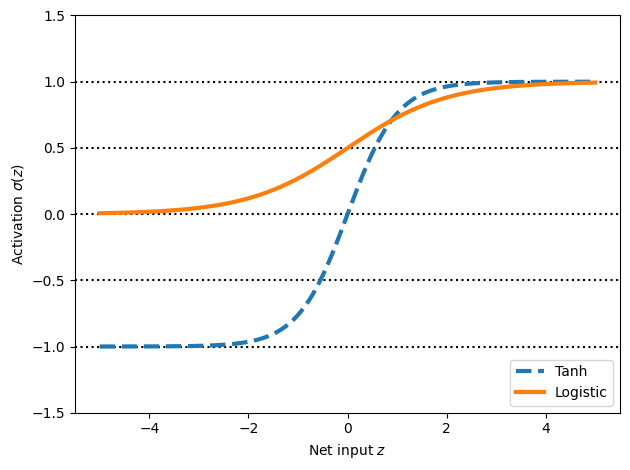

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\sigma(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()

#plt.savefig('figures/12_10.pdf')
plt.show()

In [33]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829], shape=(2000,))

In [34]:
torch.tanh(torch.from_numpy(z))

tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In [35]:
from scipy.special import expit

expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383], shape=(2000,))

In [36]:
torch.sigmoid(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

### 렐루 활성화 함수

In [37]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)

In [38]:
IPythonImage(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/12_11.png', width=500)

## 요약